# House Prediction

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# include training set
df1 = pd.read_csv('train.csv')
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# select relevant features and target variables
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

In [5]:
# Extract features (X) and target variable (y)
X = df1[features]
y = df1[target]

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Function to predict house price based on user input
def predict_price(gr_liv_area, bedroom_abv_gr, full_bath, half_bath):
    input_data = pd.DataFrame({
        'GrLivArea': [gr_liv_area],
        'BedroomAbvGr': [bedroom_abv_gr],
        'FullBath': [full_bath],
        'HalfBath': [half_bath]
    })
    predicted_price = model.predict(input_data)
    return predicted_price[0]

In [9]:
# Function to convert USD to INR
def convert_usd_to_inr(usd_price, exchange_rate=75):
    return usd_price * exchange_rate

In [10]:
# User input
gr_liv_area = float(input("Enter the square footage (GrLivArea): "))
bedroom_abv_gr = int(input("Enter the number of bedrooms (BedroomAbvGr): "))
full_bath = int(input("Enter the number of full bathrooms (FullBath): "))
half_bath = int(input("Enter the number of half bathrooms (HalfBath): "))

Enter the square footage (GrLivArea): 650
Enter the number of bedrooms (BedroomAbvGr): 3
Enter the number of full bathrooms (FullBath): 3
Enter the number of half bathrooms (HalfBath): 0


In [11]:
# Predict and display the house price
predicted_price_usd = predict_price(gr_liv_area, bedroom_abv_gr, full_bath, half_bath)
predicted_price_inr = convert_usd_to_inr(predicted_price_usd)
print(f'The predicted house price is: ${predicted_price_usd:,.2f}')
print(f'The predicted house price in INR is: ₹{predicted_price_inr:,.2f}')

The predicted house price is: $131,388.86
The predicted house price in INR is: ₹9,854,164.65


In [12]:
# Plotting charts based on user input
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

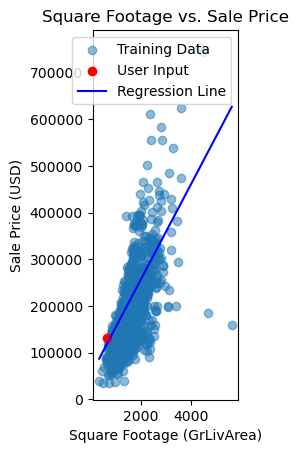

In [13]:
# Scatter plot of square footage vs. sale price with regression line
plt.subplot(1, 3, 1)
plt.scatter(df1['GrLivArea'], df1['SalePrice'], alpha=0.5, label='Training Data')
plt.scatter([gr_liv_area], [predicted_price_usd], color='red', label='User Input')
x_range = np.linspace(df1['GrLivArea'].min(), df1['GrLivArea'].max(), 100)
y_range = model.intercept_ + model.coef_[0] * x_range
plt.plot(x_range, y_range, color='blue', label='Regression Line')
plt.xlabel('Square Footage (GrLivArea)')
plt.ylabel('Sale Price (USD)')
plt.title('Square Footage vs. Sale Price')
plt.legend()

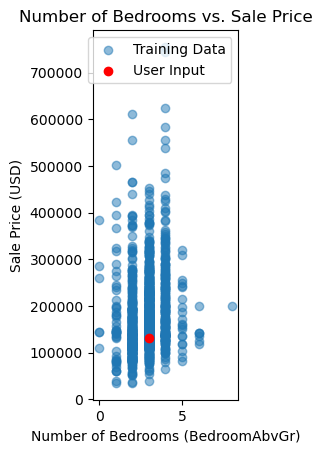

In [14]:
# Scatter plot of number of bedrooms vs. sale price
plt.subplot(1, 3, 2)
plt.scatter(df1['BedroomAbvGr'], df1['SalePrice'], alpha=0.5, label='Training Data')
plt.scatter([bedroom_abv_gr], [predicted_price_usd], color='red', label='User Input')
plt.xlabel('Number of Bedrooms (BedroomAbvGr)')
plt.ylabel('Sale Price (USD)')
plt.title('Number of Bedrooms vs. Sale Price')
plt.legend()

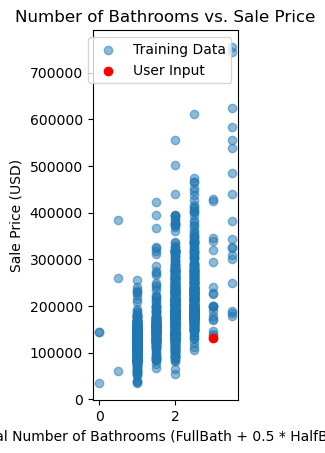

In [15]:
# Scatter plot of number of bathrooms vs. sale price
plt.subplot(1, 3, 3)
total_bath = df1['FullBath'] + df1['HalfBath'] * 0.5
user_total_bath = full_bath + half_bath * 0.5
plt.scatter(total_bath, df1['SalePrice'], alpha=0.5, label='Training Data')
plt.scatter([user_total_bath], [predicted_price_usd], color='red', label='User Input')
plt.xlabel('Total Number of Bathrooms (FullBath + 0.5 * HalfBath)')
plt.ylabel('Sale Price (USD)')
plt.title('Number of Bathrooms vs. Sale Price')
plt.legend()